# Tourmaline Taxonomy Notebook

This Python notebook will work "out of the box" with the test data included with Tourmaline. To run with your own data, make sure to change the variables in the sections **File paths & variables** and **Plot treemap charts** to match your metadata and desired parameters.

### Install dependencies (first time only)

Install QIIME 2 Jupyter extension with:

then restart your server.

(Interactive output not available on static notebook viewer services like nbviewer.)

### Packages

In [2]:
from qiime2 import Artifact
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
%matplotlib inline

### File paths & variables

**User should change the values of `method` and `filtering` if they used a different method or filtering. The value of `tourmdir` should be changed if this notebook is not being run from its original location in the `notebooks` directory.**

In [3]:
tourmdir = '..'
method = 'dada2-pe'
filtering = 'unfiltered'

In [4]:
inputs = {
  'metadata': '%s/00-data/metadata.tsv' % tourmdir,
  'taxonomy': '%s/02-output-%s-%s/01-taxonomy/taxonomy.qza' % (tourmdir, method, filtering),
  'table': '%s/02-output-%s-%s/00-table-repseqs/table.qza' % (tourmdir, method, filtering),
}

### Metadata

In [5]:
df_md = pd.read_csv(inputs['metadata'], sep='\t', index_col=0)

In [6]:
df_md.head(2)

,sample_name_water,taxon_id,scientific_name,host_subject_id,physical_specimen_location,physical_specimen_remaining,collection_timestamp,latitude,longitude,lat_lon,...,target_subfragment,pcr_primers,pcr_primer_names,seq_meth,seq_platform,seq_model,seq_chemistry,run_center,run_date,submitted_to_insdc
sample_name,,,,,,,,,,,,,,,,,,,,,
SC07.22,SC07,1647806,lake water metagenome,SC07.22,GLERL,True,2018-09-02 17:55,41.703429,-83.070773,41.70342935 -83.07077346,...,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019",True
SC07.50,SC07,1647806,lake water metagenome,SC07.50,GLERL,True,2018-09-02 17:55,41.703429,-83.070773,41.70342935 -83.07077346,...,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019",True


### Feature table

In [7]:
table = Artifact.load(inputs['table'])
df_table = table.view(view_type=pd.DataFrame)

In [8]:
df_table.head(2)

,b744eae1244325f606575483df0de67e,9cfa52be027c8fa57d197b21dd7a958c,3f456a18968cea5c5e549e281f0f5808,251fb9e771085e0267a4f87cf841ce2f,01514b1eefaab7c2b75c8a9d0f1c85e6,3eeb4a6278652363d350b5391ebeb470,8a06c5836b61ad5476c93f2b7d2b9311,3b26ecfcd2d6fcb7e7a3493e5788c1bc,6b94959874b693c3304e68c57cefd287,4e2d0baae4086a5f74e74e70bb12bf03,...,3e834f7ea643d4a772d7e4196781ea7d,f1b355a5bba01224d7fb8deca6d96b41,752a0b05b0f77cb31c05a65f4e322487,264dab11766c188cdbdb62a233fa738f,98e3d05c0e8980b343dddd744adc4260,1a27c63f6fee3c9b10ea7224d75f70b4,6208bbf143fc29e81ad75b876a9a24ab,e2b82a3e451a8e43e175bbeb3a56a713,2753d01dfea1ef6cea361b4ed91cc256,3b7badb7274fad25197a014df653c15e
SC07.22,100.0,100.0,74.0,0.0,6.0,0.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC07.50,8.0,12.0,8.0,0.0,16.0,0.0,0.0,0.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Taxonomy (split by level)

In [9]:
df_table.T

,SC07.22,SC07.50,SC13.22,SC13.50,SC16.22,SC16.50,SC18.22,SC18.50,SC51.22,SC51.50,SC53.22,SC53.50,SC54.22,SC54.50,SC56.22,SC56.50
b744eae1244325f606575483df0de67e,100.0,8.0,120.0,12.0,137.0,10.0,141.0,12.0,95.0,4.0,66.0,5.0,63.0,12.0,146.0,35.0
9cfa52be027c8fa57d197b21dd7a958c,100.0,12.0,95.0,17.0,61.0,16.0,70.0,15.0,49.0,14.0,48.0,16.0,28.0,0.0,22.0,5.0
3f456a18968cea5c5e549e281f0f5808,74.0,8.0,55.0,5.0,70.0,0.0,68.0,6.0,45.0,12.0,24.0,0.0,39.0,0.0,68.0,14.0
251fb9e771085e0267a4f87cf841ce2f,0.0,0.0,0.0,29.0,0.0,7.0,0.0,0.0,33.0,106.0,30.0,135.0,0.0,0.0,0.0,0.0
01514b1eefaab7c2b75c8a9d0f1c85e6,6.0,16.0,16.0,21.0,7.0,13.0,3.0,0.0,20.0,50.0,21.0,46.0,5.0,19.0,12.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a27c63f6fee3c9b10ea7224d75f70b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
6208bbf143fc29e81ad75b876a9a24ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
e2b82a3e451a8e43e175bbeb3a56a713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2753d01dfea1ef6cea361b4ed91cc256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [10]:
taxonomy = Artifact.load(inputs['taxonomy'])
df_tax = taxonomy.view(view_type=pd.DataFrame)

In [11]:
df_tax.head(2)

,Taxon,Consensus
Feature ID,,
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
016a372ed10b8fc27e6f925c235c1dd4,d__Bacteria; p__Armatimonadota; c__Fimbriimona...,1.0


In [12]:
# value for number of possible taxa is absurdly large (100) to accommodate all cases
df_tax_split = df_tax['Taxon'].str.split('; ', n=100, expand=True)
df_tax2 = pd.concat([df_tax, df_tax_split], axis=1)
df_tax2.fillna('undefined', inplace=True)
levels = df_tax2.shape[1] - 2

In [13]:
df_tax2.head(2)

,Taxon,Consensus,0,1,2,3,4,5,6
Feature ID,,,,,,,,,
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Chloroplast,f__Chloroplast,g__Chloroplast,undefined
016a372ed10b8fc27e6f925c235c1dd4,d__Bacteria; p__Armatimonadota; c__Fimbriimona...,1.0,d__Bacteria,p__Armatimonadota,c__Fimbriimonadia,o__Fimbriimonadales,f__Fimbriimonadaceae,g__Fimbriimonadaceae,undefined


### Merge taxonomy with feature table

In [14]:
df_tax_table = pd.merge(df_tax2, df_table.T, left_index=True, right_index=True)

In [15]:
df_tax_table.head(2)

,Taxon,Consensus,0,1,2,3,4,5,6,SC07.22,...,SC18.22,SC18.50,SC51.22,SC51.50,SC53.22,SC53.50,SC54.22,SC54.50,SC56.22,SC56.50
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Chloroplast,f__Chloroplast,g__Chloroplast,undefined,6.0,...,3.0,0.0,20.0,50.0,21.0,46.0,5.0,19.0,12.0,47.0
016a372ed10b8fc27e6f925c235c1dd4,d__Bacteria; p__Armatimonadota; c__Fimbriimona...,1.0,d__Bacteria,p__Armatimonadota,c__Fimbriimonadia,o__Fimbriimonadales,f__Fimbriimonadaceae,g__Fimbriimonadaceae,undefined,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot taxonomy bar charts

In [16]:
# Group by taxonomic level (list of dataframes) and normalize (list of dataframes)
df_tax_table_list = []
df_tax_table_norm_list = []
for i in range(levels):
    df = df_tax_table.groupby(i).sum(numeric_only=True).T
    df_tax_table_list.append(df)
    df_norm = df.div(df.sum(axis=1), axis=0)
    df_tax_table_norm_list.append(df_norm)

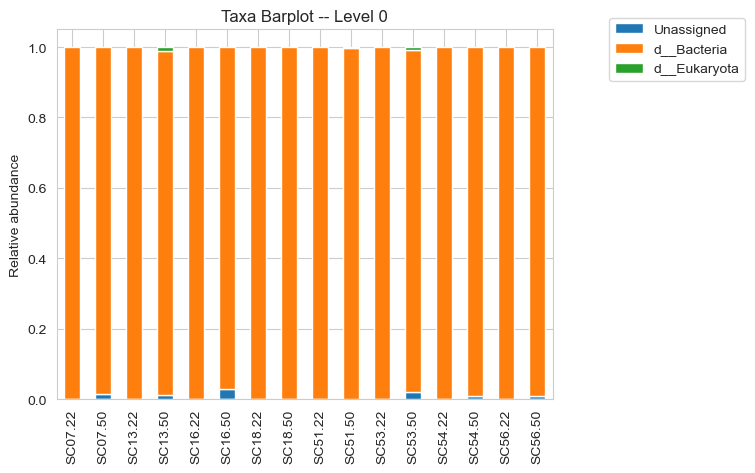

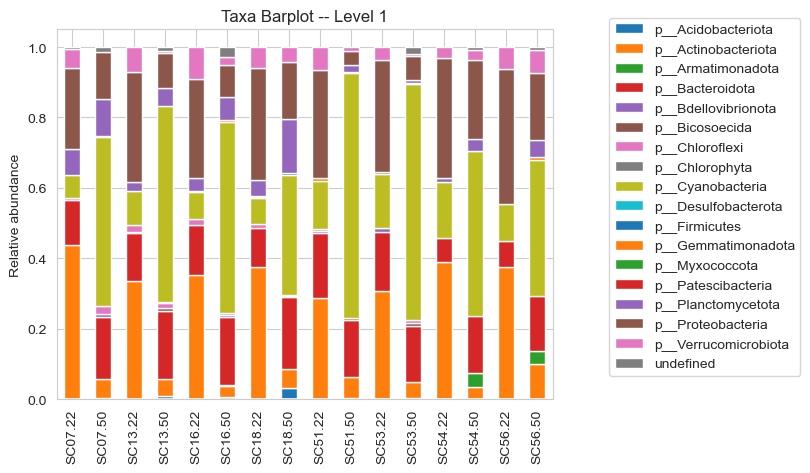

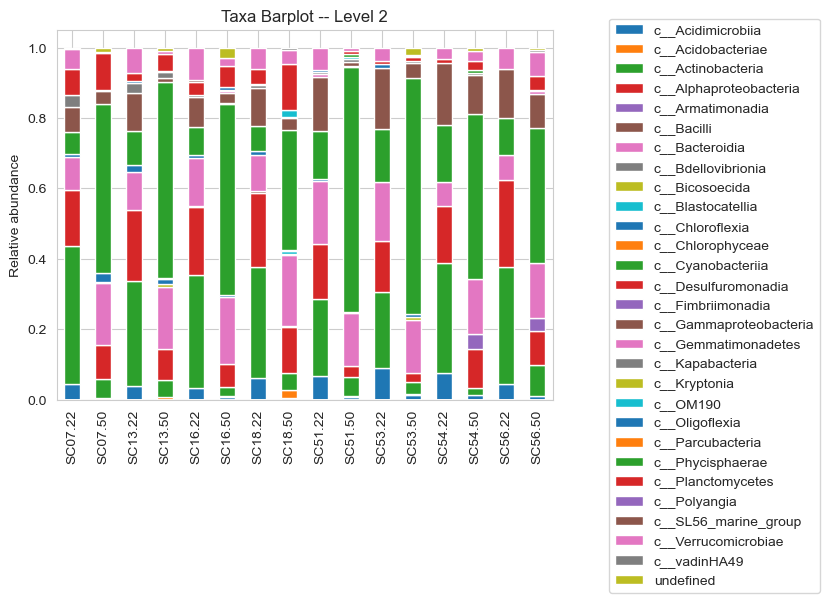

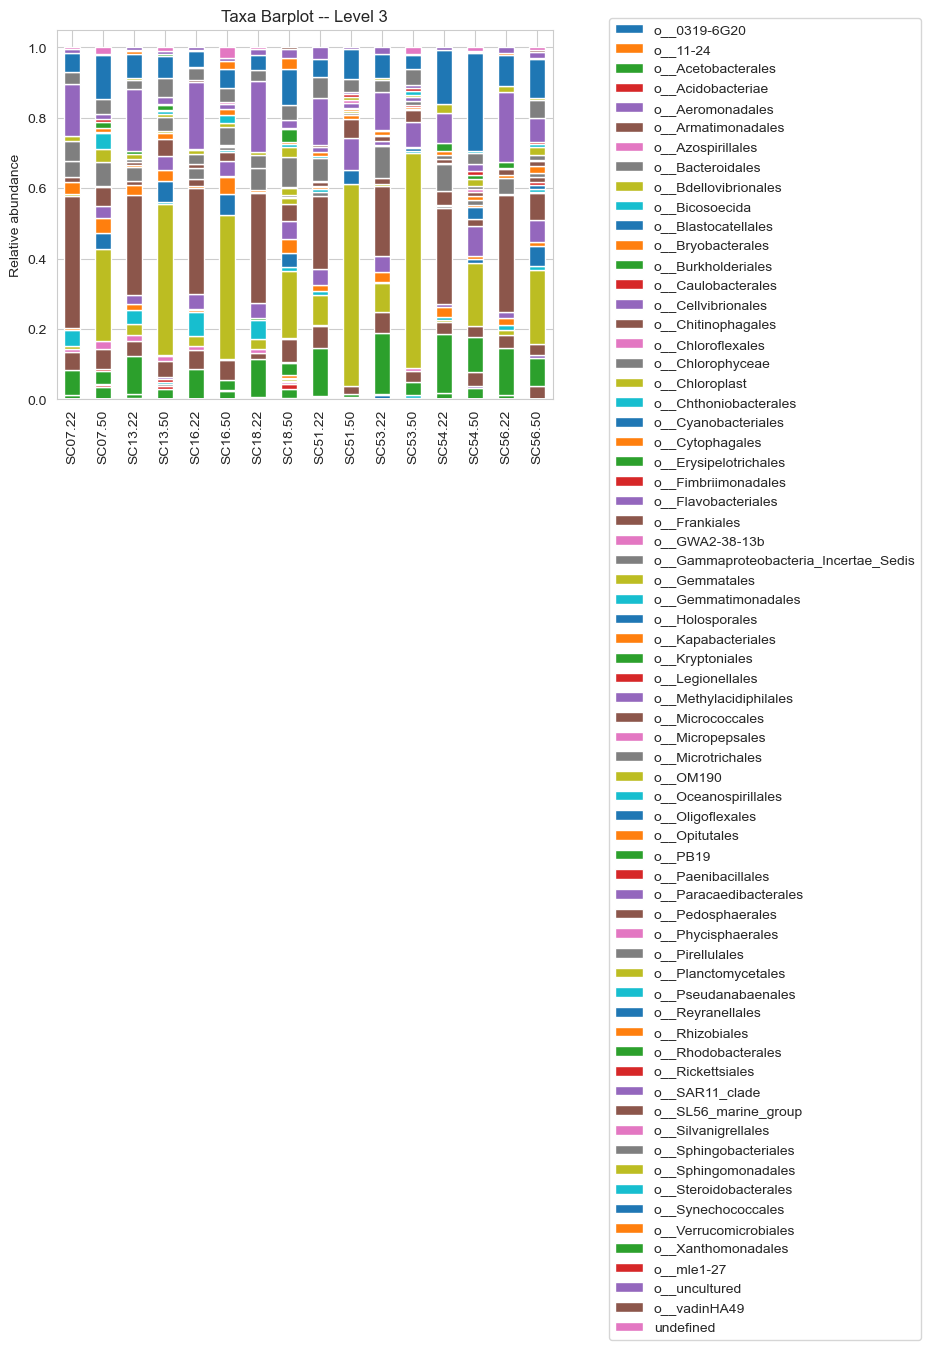

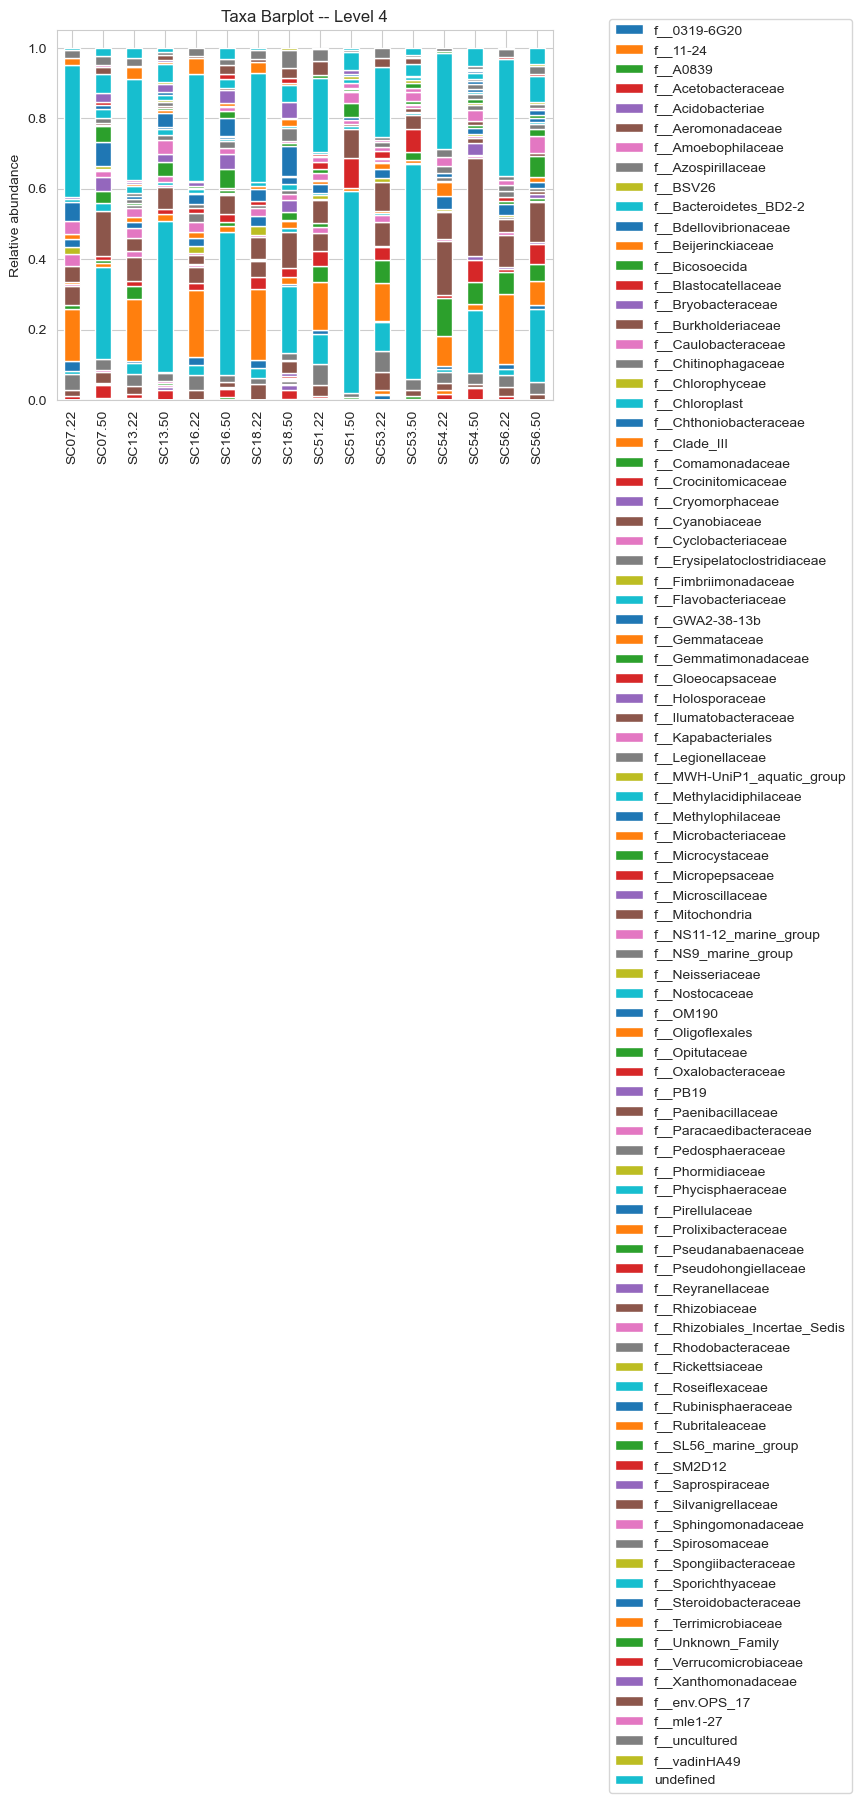

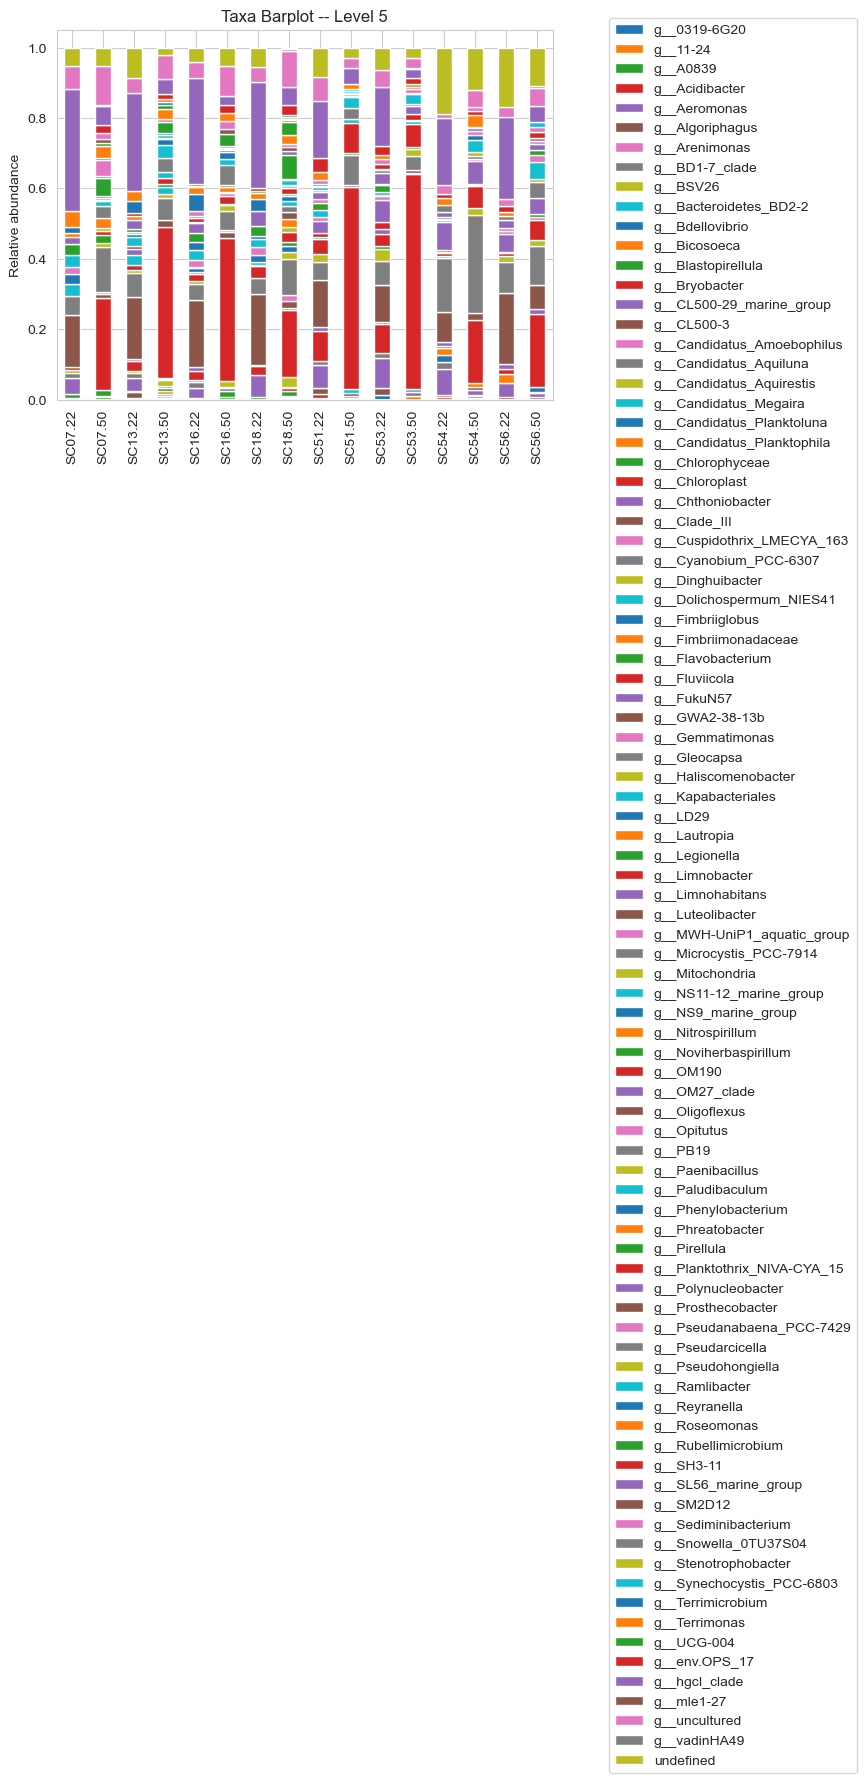

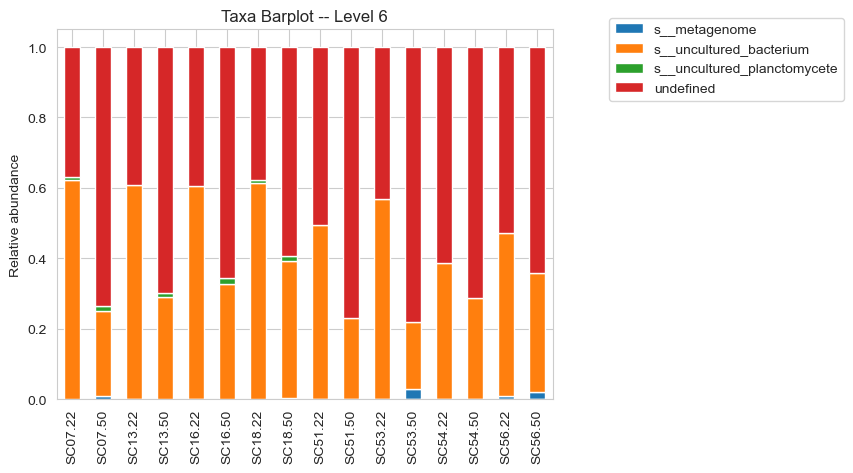

In [17]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

for i in range(levels):

    # Create the barplot
    fig, ax = plt.subplots()
    df_tax_table_norm_list[i].plot(kind='bar', stacked=True, ax=ax)
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    # Add labels and title
    plt.ylabel('Relative abundance')
    plt.title('Taxa Barplot -- Level %s' % i)

    # Save figure
    plt.savefig('taxa_barplot_level_%s.pdf' % i, bbox_inches='tight')

### Plot treemap charts

**User must change the values of `category`, `level1`, and `level2` to suit their data and needs.**

In [18]:
# Which samples (metadata category) do you want to include? Choose an invariant category to plot all samples
category = 'filter_size'
catvalues = list(df_md[category].value_counts().index)

# Which two taxonomic levels (top level is 0) do you want to display? level1 must be above level2
level1 = 1
level2 = 3

In [19]:
# Create dict of tmlevel2 to tmlevel1
taxdict = dict(zip(df_tax2[level2].values, df_tax2[level1].values))

In [20]:
# Plot treemap for each category value
for catvalue in catvalues:

    # Get the list of samples having the selected category value
    catindexes = df_md[df_md[category] == catvalue].index

    # Calculate average relative abundance of the selected samples at the lower taxonomic level
    relabund_level2 = df_tax_table_norm_list[level2].loc[catindexes].mean()
    
    # Create a dataframe with columns: TaxonLevel2, TaxonLevel1, RelAbund
    df_treemap = pd.DataFrame(relabund_level2).reset_index()
    df_treemap.columns = ['TaxonLevel2', 'RelAbund']
    df_treemap['TaxonLevel1'] = [taxdict[x] for x in df_treemap['TaxonLevel2']]
    df_treemap = df_treemap[['TaxonLevel2', 'TaxonLevel1', 'RelAbund']]
    
    # Plot treemap
    fig = px.treemap(df_treemap, path=[px.Constant('%s: %s' % (category, catvalue)), 'TaxonLevel1', 'TaxonLevel2'], 
                     values='RelAbund', color='TaxonLevel1', color_continuous_scale='RdBu', 
                     color_discrete_map={'(?)':'lightgray'})
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.show()
    pio.write_image(fig, 'treemap_%s_%s.pdf' % (category, catvalue))